## Features for Mitchell Models:  
We define some features for the model. Our quantities of interest are:
- The activation
- The upstroke peak




In [ ]:
%%writefile mitchell_features.py
import uncertainpy as un
import chaospy as cp
import numpy as np

from mitchell import mitchell

## features definitions:
def dVm_dt_max(time, values, info):
    
    dt = time[1]-time[0]
    max_dV = (values[1]-values[0])/dt
    for i in range((np.shape(values)[0])-2):
        temp = (values[i+2]-values[i+1])/dt
        #print(temp)
        #print()
        if(temp > max_dV):
            max_dV = temp
    
    values_feature = max_dV
    
    #return time_feature, values_feature
    return None, values_feature

def V_max(time, values, info):
    
    values_feature = np.max(values)
    
    #return time_feature, values_feature
    return None, values_feature

def APD_50(time, values, info): 
    
    delta_V = np.max(values) - values[0]
    delta_V_50 = np.max(values) - delta_V*0.5
    delta_time_50 = time[-1] # Nel caso in cui non lo raggiunga (da sistemare, anche i parametri)
    pol=10 # (better to fix) just to be sure i already passed zero during polarization

    for i in range((np.shape(values)[0])-10):
        if(values[i+pol]<=delta_V_50):
            delta_time_50 = time[i+pol]
            break
            
    values_feature = delta_time_50   
            
    return None, values_feature

def APD_90(time, values, info): 
    
    delta_V = np.max(values) - values[0]
    delta_V_90 = np.max(values) - delta_V*0.9
    delta_time_90 = time[-1]
    pol=10 # (better to fix) just to be sure i already passed zero during polarization

    for i in range((np.shape(values)[0])-10):
        if(values[i+pol]<=delta_V_90):
            delta_time_90 = time[i+pol]
            break
    
    values_feature = delta_time_90
            
    return None, values_feature

def V_20(time, values, info):
    
    toi = APD_90(time, values, info)[1]*0.2 #time of interest
    pol=10 # (better to fix) just to be sure i already passed zero during polarization
    values_feature=0
    
    for i in range((np.shape(values)[0])-10):
        if(time[i+pol]>=toi):
            values_feature = values[i+pol]
            break
    
    #return time_feature, values_feature
    return None, values_feature

def V_40(time, values, info):
    
    toi = APD_90(time, values, info)[1]*0.4 #time of interest
    pol=10 # (better to fix) just to be sure i already passed zero during polarization
    values_feature=0
    
    for i in range((np.shape(values)[0])-10):
        if(time[i+pol]>=toi):
            values_feature = values[i+pol]
            break
    
    #return time_feature, values_feature
    return None, values_feature

def V_60(time, values, info):
    
    toi = APD_90(time, values, info)[1]*0.6 #time of interest
    pol=10 # (better to fix) just to be sure i already passed zero during polarization
    values_feature=0
    
    for i in range((np.shape(values)[0])-10):
        if(time[i+pol]>=toi):
            values_feature = values[i+pol]
            break
    
    #return time_feature, values_feature
    return None, values_feature

def V_80(time, values, info):
    
    toi = APD_90(time, values, info)[1]*0.8 #time of interest
    pol=10 # (better to fix) just to be sure i already passed zero during polarization
    values_feature=0
    
    for i in range((np.shape(values)[0])-10):
        if(time[i+pol]>=toi):
            values_feature = values[i+pol]
            break
    
    #return time_feature, values_feature
    return None, values_feature

def rest_Vm(time, values, info):
    
    # Da modificare quando si capisce e si modifica l'intervallo di tempo su cui operare
    values_feature = values[-1] # ultimo valore per ora
    
    #return time_feature, values_feature
    return None, values_feature





# Initialize the model
model = un.Model(run=mitchell,
                 labels=["Time (ms)", "Membrane potential (mV)"])

parameters = {#"IstimEnd":50000,
            #"IstimAmplitude":0.05,
            "IstimPeriod":500,
            "IstimPulseDuration":1,
            "tau_in":0.3,
            "tau_open":120.0, #75
            "tau_close": 150.0, #80
            "V_gate":0.13,
            "tau_out": 6.0}

# Create the parameters
parameters = un.Parameters(parameters)

# Set all parameters to have a uniform distribution
# within a 50% interval around their fixed value
parameters.set_all_distributions(un.uniform(0.2))

feature_functions = [dVm_dt_max, V_max, V_20, V_40, V_60, V_80, APD_50, APD_90, rest_Vm]

features = un.Features(
    new_features=feature_functions,
    features_to_run="all"
)

# Perform the uncertainty quantification
UQ = un.UncertaintyQuantification(model,
                                  parameters=parameters,
                                  features=features)

data = UQ.quantify(seed=10,
                  method = "mc")

In [9]:
import uncertainpy as un 
import numpy as np
data = un.Data()
data.load("data_feat/mitchell.h5")

In [13]:
def get_all_keys_in_order(list_of_dicts):
    ordered_keys = []
    for dict_ in list_of_dicts:
        for key in dict_:
            if key not in ordered_keys:
                ordered_keys.append(key)
    return ordered_keys


parameters = {#"IstimEnd":50000,
            #"IstimAmplitude":0.05,
            "IstimPeriod":500,
            "IstimPulseDuration":1,
            "tau_in":0.3,
            "tau_open":120.0, #75
            "tau_close": 150.0, #80
            "V_gate":0.13,
            "tau_out": 6.0}


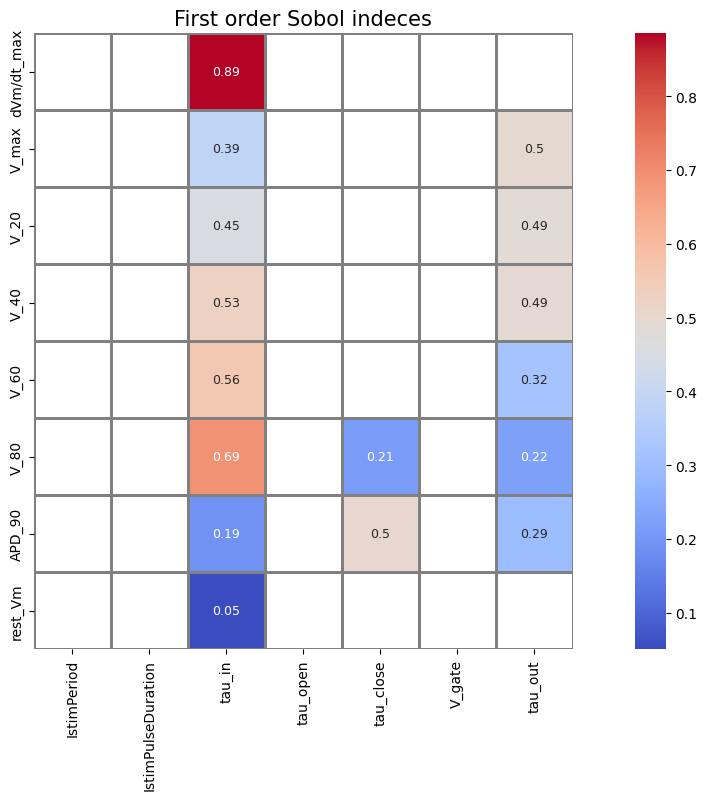

In [19]:
import pandas as pd
#matrix = np.array([data["V_max"].sobol_first, data["dVm_dt_max"].sobol_first])

df = pd.DataFrame({#'V_membrane':data["mitchell"].sobol_first_average, 
                   'dVm/dt_max':data["dVm_dt_max"].sobol_first_average, 
                   'V_max':data["V_max"].sobol_first,
                   'V_20':data["V_20"].sobol_first,
                   'V_40':data["V_40"].sobol_first,
                   'V_60':data["V_60"].sobol_first,
                   'V_80':data["V_80"].sobol_first,
                   #'APD_50':data["APD_50"].sobol_first, 
                   'APD_90':data["APD_90"].sobol_first,
                   'rest_Vm':data["rest_Vm"].sobol_first})
df = df.transpose()
df.columns = get_all_keys_in_order([parameters])

import seaborn as sns
import matplotlib.pylab as plt

fig, ax = plt.subplots(figsize=(16, 8))
mask = np.array(df < 0.05)

ax = sns.heatmap(df, linewidth=0.8, annot=True, square=True, ax=ax, 
                 cmap='coolwarm', annot_kws={"fontsize": 9}, mask=mask,
                 linecolor='grey')
ax.set_title("First order Sobol indeces", fontsize=15)

plt.show()


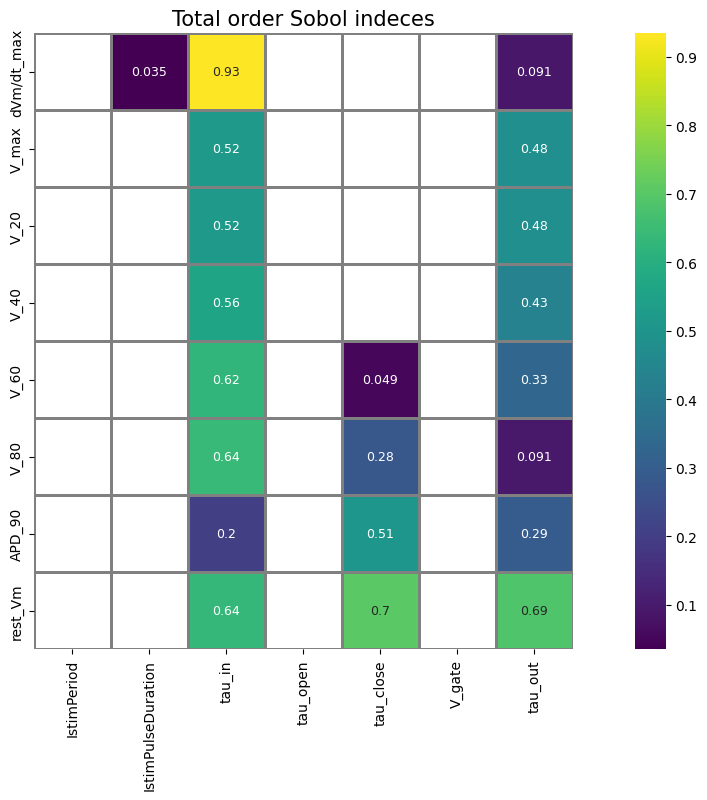

In [18]:
### SOBOL TOTAL ###

import pandas as pd
matrix = np.array([data["V_max"].sobol_first, data["dVm_dt_max"].sobol_first])
matrix

df = pd.DataFrame({'dVm/dt_max':data["dVm_dt_max"].sobol_total, 
                   'V_max':data["V_max"].sobol_total,
                   'V_20':data["V_20"].sobol_total,
                   'V_40':data["V_40"].sobol_total,
                   'V_60':data["V_60"].sobol_total,
                   'V_80':data["V_80"].sobol_total,
                   #'APD_50':data["APD_50"].sobol_total, 
                   'APD_90':data["APD_90"].sobol_total,
                   'rest_Vm':data["rest_Vm"].sobol_total})
df = df.transpose()
df.columns = get_all_keys_in_order([parameters])

import seaborn as sns
import matplotlib.pylab as plt

fig, ax = plt.subplots(figsize=(16, 8))
mask = np.array(abs(df) < 0.01)

ax = sns.heatmap(df, linewidth=0.8, annot=True, square=True, ax=ax, 
                 cmap='viridis', annot_kws={"fontsize": 9}, mask=mask,
                 linecolor='grey')
ax.set_title("Total order Sobol indeces", fontsize=15)

plt.show()
